In [436]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve,plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,HistGradientBoostingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_percentage_error

import pickle
import warnings
warnings.filterwarnings('ignore')

In [388]:
power = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
power.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


## EDA

In [292]:
power.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

**All columns present in our dataset.**

In [293]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

**Information of dataset.**
- RangeIndex: 0 to 906
- Data columns: 27
- dtypes: float64(15), object(12)

In [268]:
power.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


**- Description of dataset.**
- Count.
- Mean.
- Standard deviation.
- Mininum
- 1st Quantile (25%)
- 2nd Quantile (50%)
- 3rd Quantile (75%)
- Maximum.

In [389]:
power.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Most of the columns are having null values.

**- Dropping the columns with all null values.**

In [390]:
df = power.drop(columns = ['country','country_long','other_fuel1','other_fuel2','other_fuel3','wepp_id','url','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','generation_data_source'])

**- Dropping Null values for latitude,longitude,geolocation_source columns(unique values).**

In [393]:
df.dropna(subset = ['latitude','longitude','geolocation_source'],inplace = True)
df.shape

(861, 16)

**- Filling missing values with Mode().**

In [394]:
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])
df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])

**- Filling missing values with Mean().**

In [395]:
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2018'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())

In [396]:
df.isna().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
owner                    0
source                   0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

Now, no null values are present.

## Visualisation.

In [49]:
def plot(x,y,data):
    plt.figure()
    plt.scatter(x,y,data=df)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

Scatterpot between primary_fuel and capacity_mw


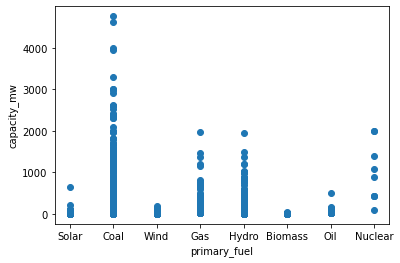

In [50]:
plot('primary_fuel','capacity_mw',data = df)

Scatterpot between generation_gwh_2014 and capacity_mw


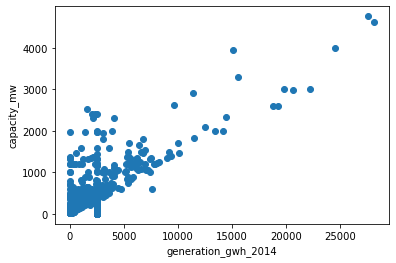

Scatterpot between generation_gwh_2015 and capacity_mw


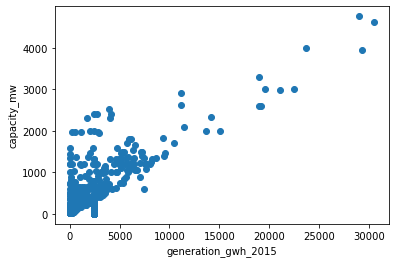

Scatterpot between generation_gwh_2016 and capacity_mw


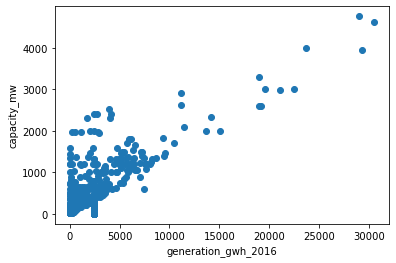

Scatterpot between generation_gwh_2017 and capacity_mw


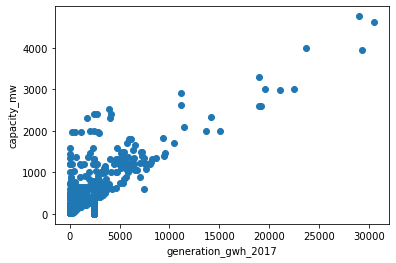

Scatterpot between generation_gwh_2018 and capacity_mw


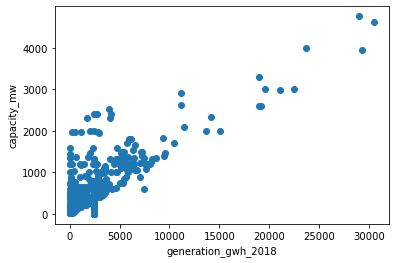

In [65]:
plot('generation_gwh_2014','capacity_mw',data= df)
plot('generation_gwh_2015','capacity_mw',data= df)
plot('generation_gwh_2016','capacity_mw',data= df)
plot('generation_gwh_2017','capacity_mw',data= df)
plot('generation_gwh_2018','capacity_mw',data= df)

Scatterpot between generation_gwh_2014 and primary_fuel


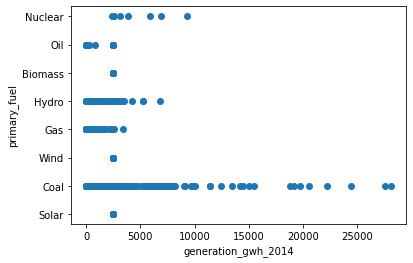

Scatterpot between generation_gwh_2015 and primary_fuel


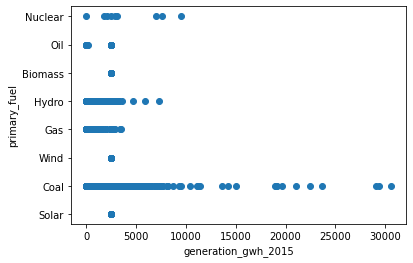

Scatterpot between generation_gwh_2016 and primary_fuel


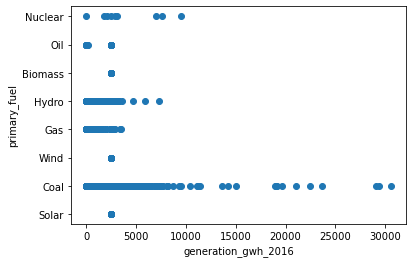

Scatterpot between generation_gwh_2017 and primary_fuel


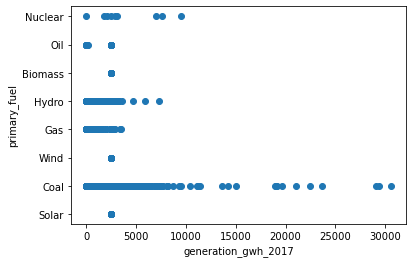

Scatterpot between generation_gwh_2018 and primary_fuel


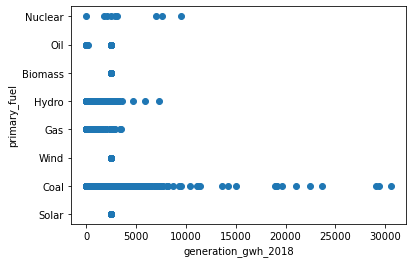

In [66]:
plot('generation_gwh_2014','primary_fuel',data= df)
plot('generation_gwh_2015','primary_fuel',data= df)
plot('generation_gwh_2016','primary_fuel',data= df)
plot('generation_gwh_2017','primary_fuel',data= df)
plot('generation_gwh_2018','primary_fuel',data= df)

Scatterpot between commissioning_year and primary_fuel


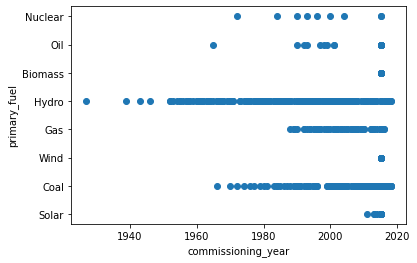

In [74]:
plot('commissioning_year','primary_fuel',data = df)

Scatterpot between primary_fuel and geolocation_source


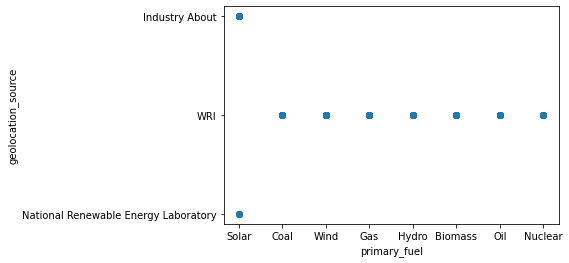

In [85]:
plot('primary_fuel','geolocation_source',data = df)

<AxesSubplot:xlabel='primary_fuel', ylabel='owner'>

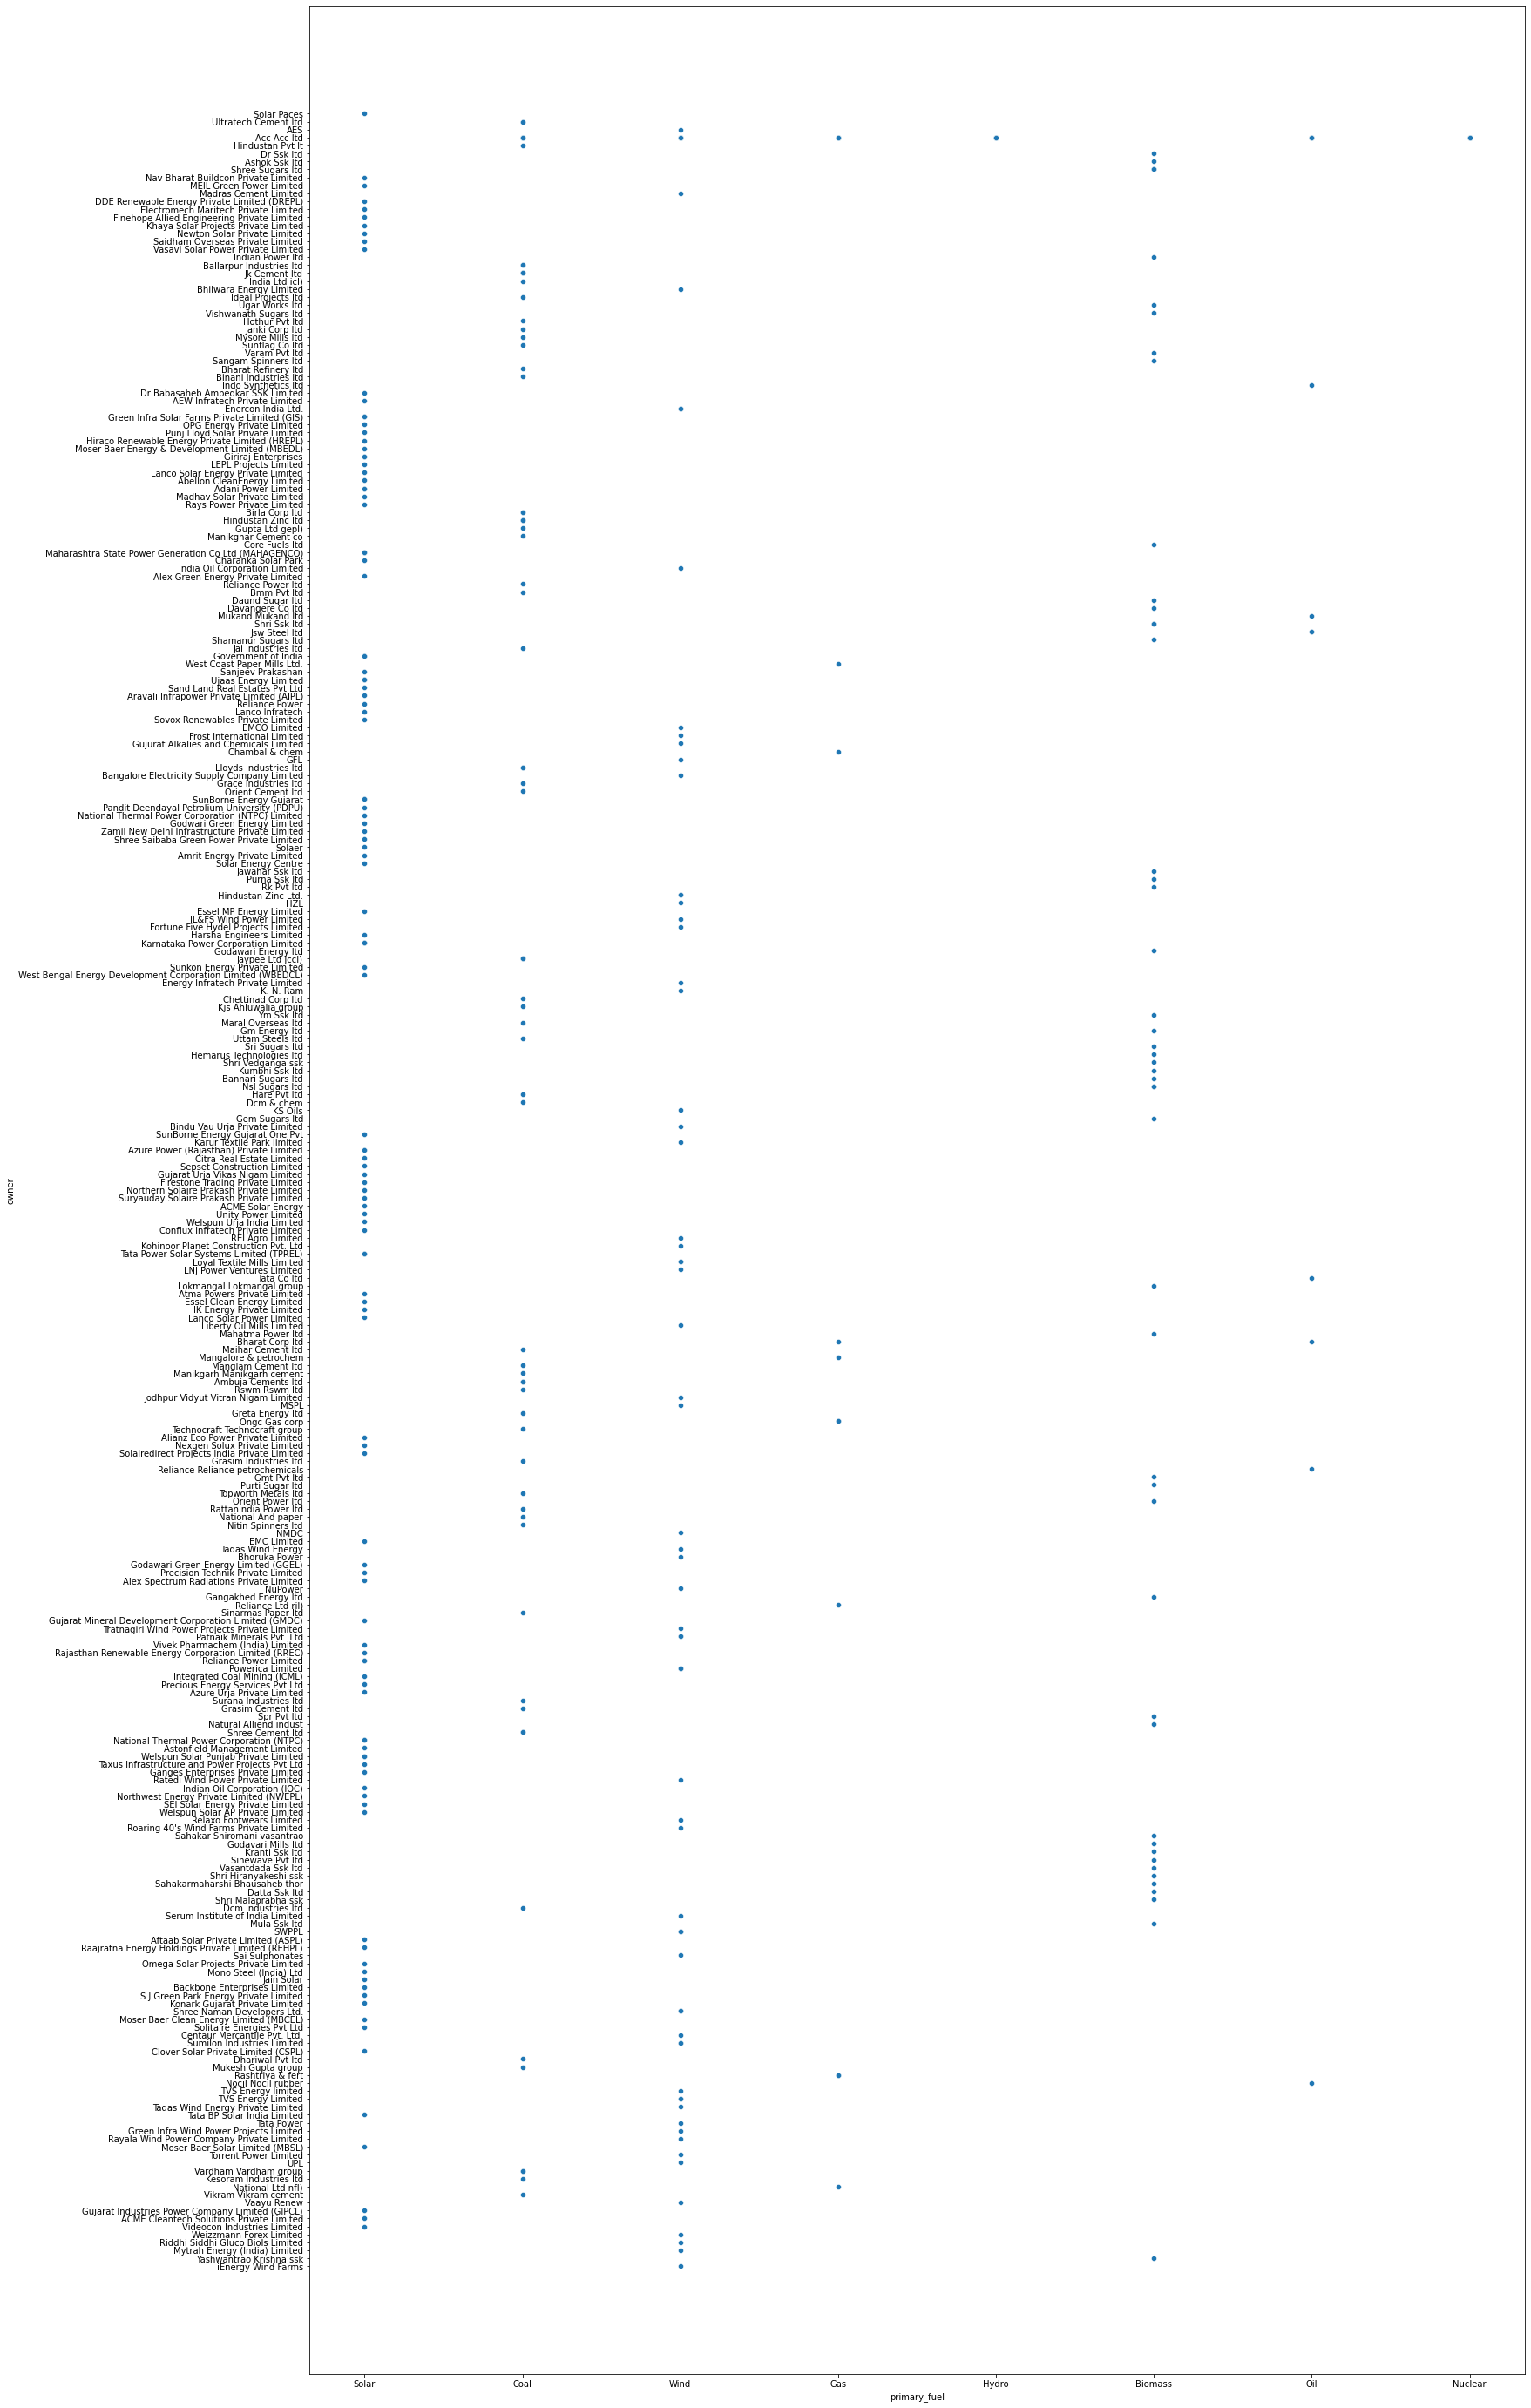

In [97]:
plt.figure(figsize=(25,50))
sns.scatterplot('primary_fuel','owner',data = df)

<AxesSubplot:xlabel='primary_fuel', ylabel='source'>

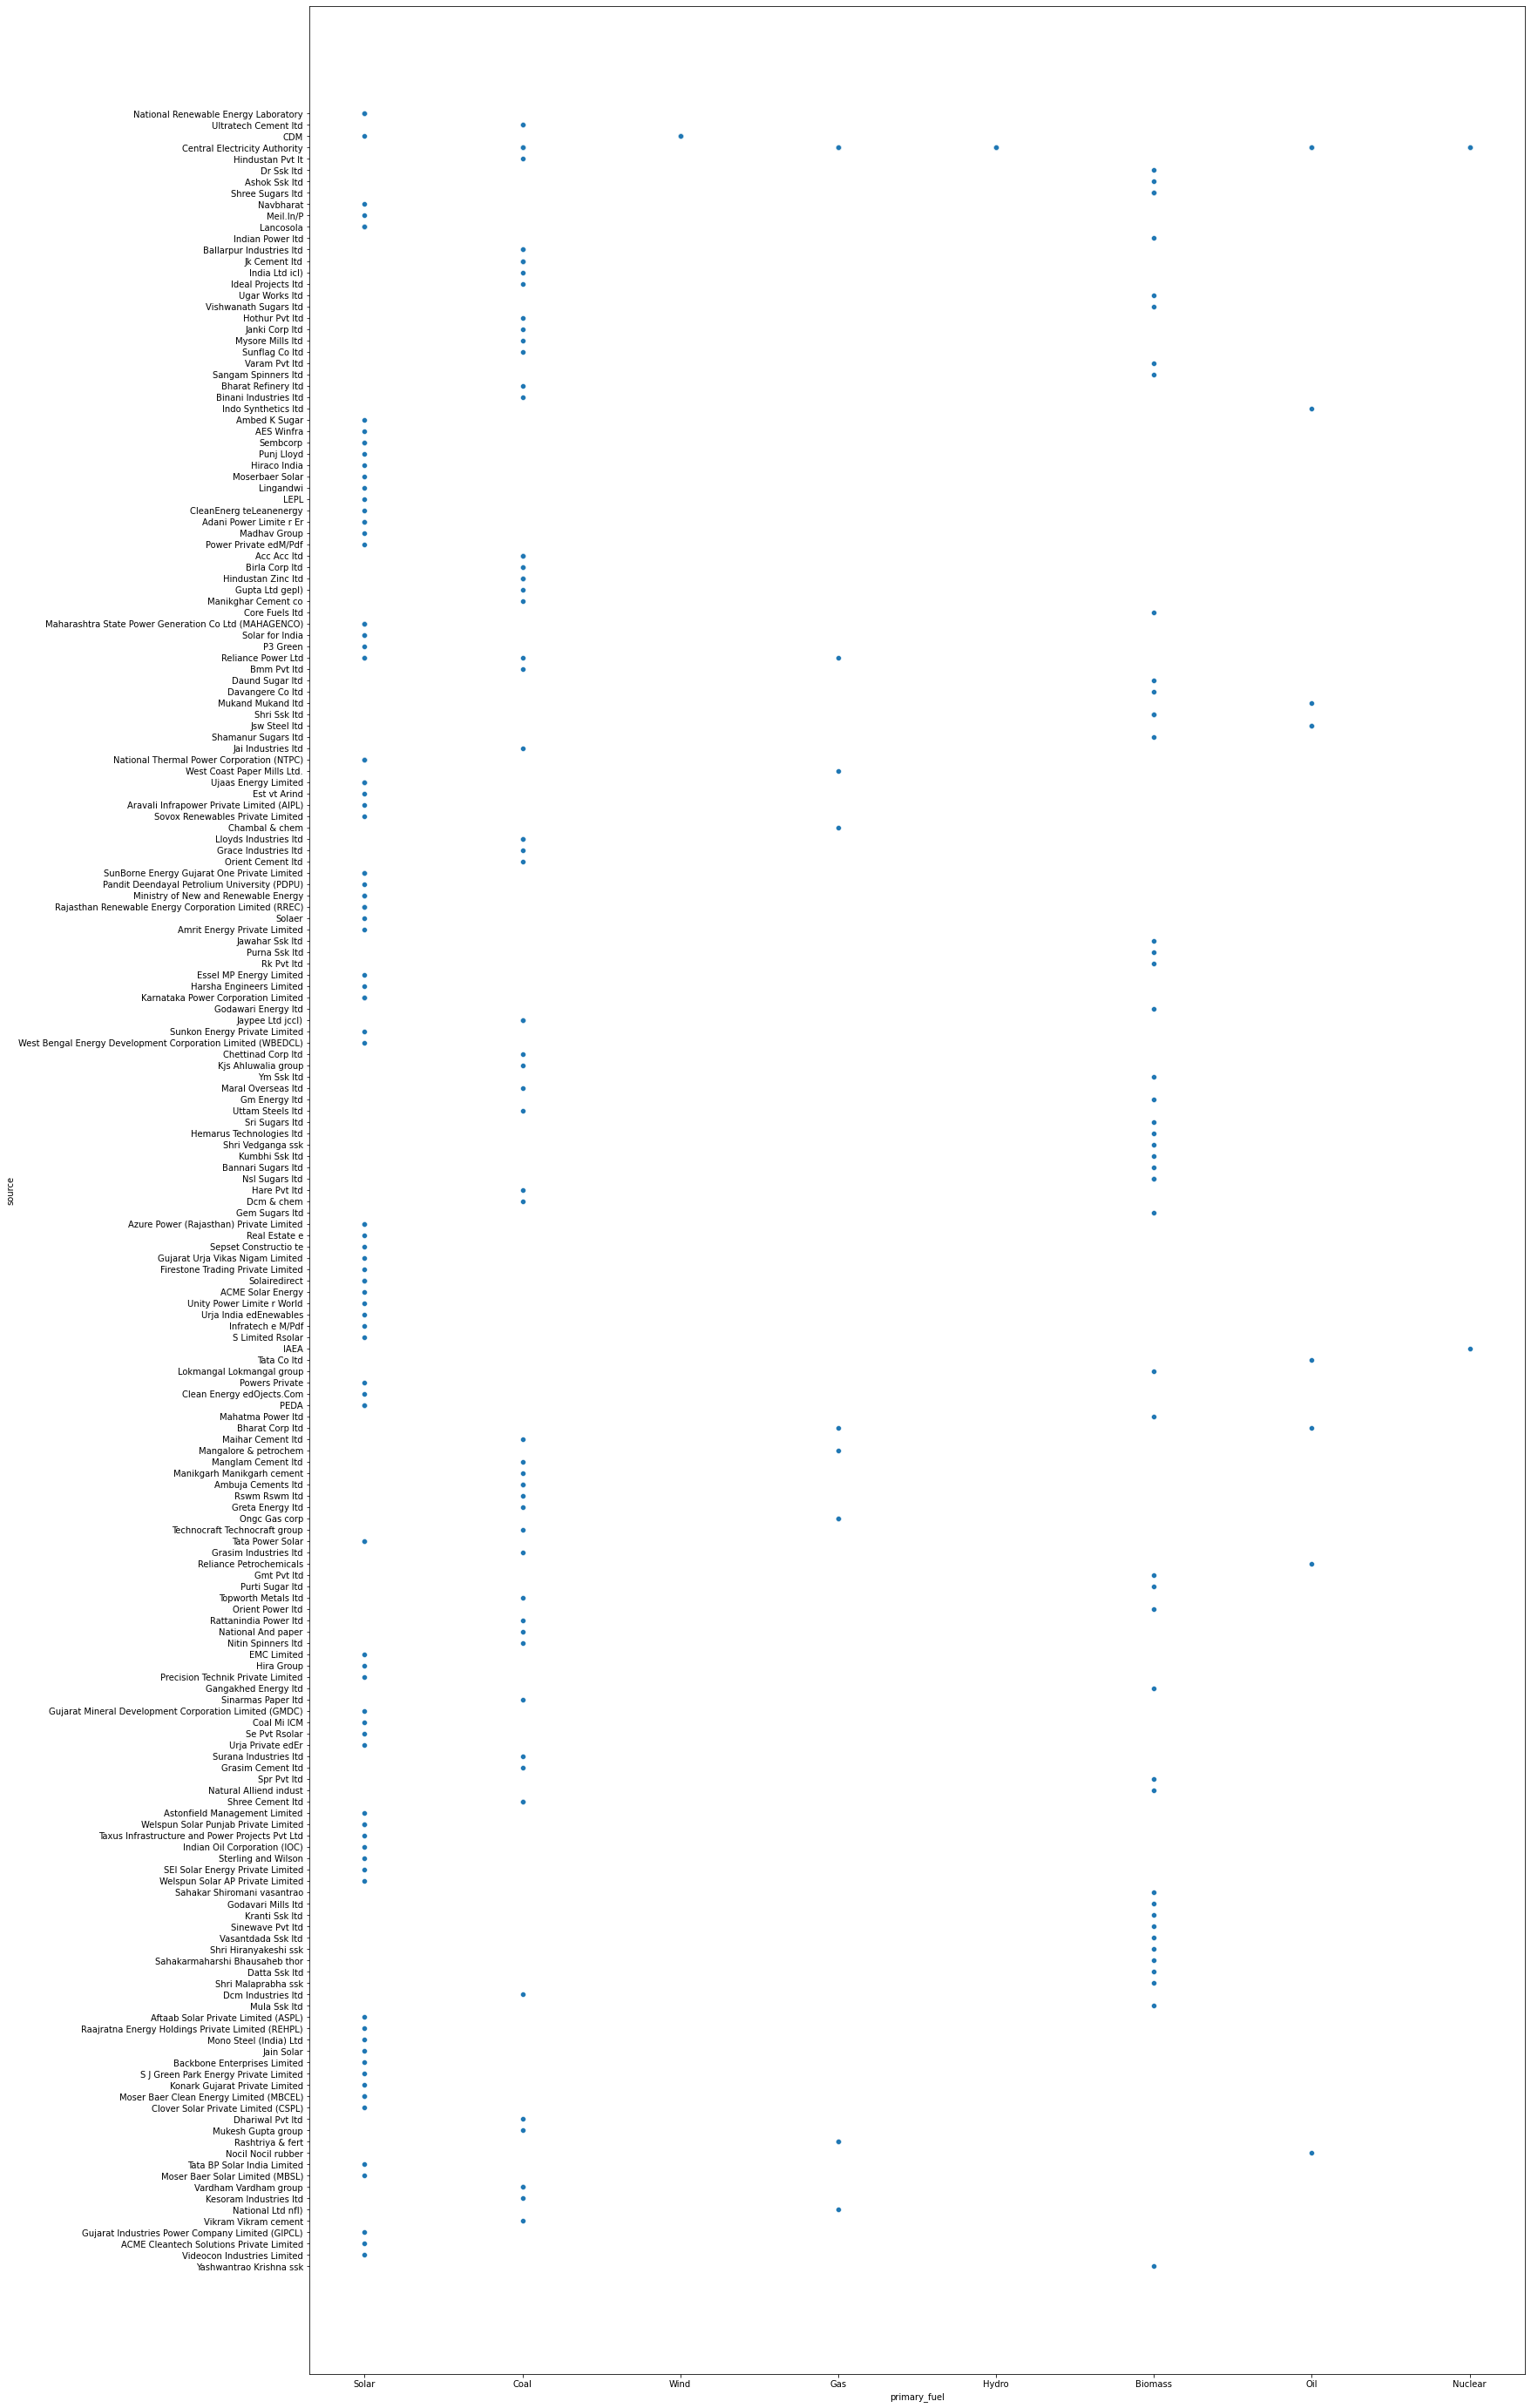

In [82]:
plt.figure(figsize=(25,50))
sns.scatterplot('primary_fuel','source',data = df)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

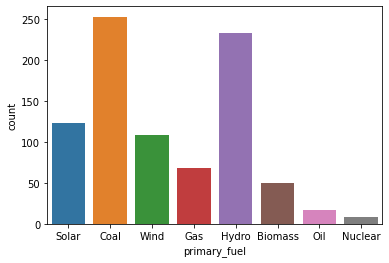

In [72]:
sns.countplot(df['primary_fuel'])

**- Dropping the Unwanted object columns.**

In [397]:
df.drop(columns = ['name','gppd_idnr','owner','year_of_capacity_data'],inplace = True)

In [398]:
df.shape

(861, 12)

## Encoding.

In [399]:
lb = LabelEncoder()
df['geolocation_source'] = lb.fit_transform(df['geolocation_source'])
df['source'] = lb.fit_transform(df['source'])

## Target Column:

In [309]:
df['primary_fuel'].value_counts()

Coal       253
Hydro      233
Solar      123
Wind       108
Gas         68
Biomass     50
Oil         17
Nuclear      9
Name: primary_fuel, dtype: int64

**- Encoding target columns as :**
- Thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal)
- Renewables (e.g. hydro, wind, solar)

In [401]:
df['primary_fuel'] = df['primary_fuel'].replace('Hydro',0)
df['primary_fuel'] = df['primary_fuel'].replace('Wind',0)
df['primary_fuel'] = df['primary_fuel'].replace('Solar',0)

In [402]:
df['primary_fuel'] = df['primary_fuel'].replace('Coal',1)
df['primary_fuel'] = df['primary_fuel'].replace('Gas',1)
df['primary_fuel'] = df['primary_fuel'].replace('Biomass',1)
df['primary_fuel'] = df['primary_fuel'].replace('Oil',1)
df['primary_fuel'] = df['primary_fuel'].replace('Nuclear',1)

In [403]:
df['primary_fuel'].value_counts()

0    464
1    397
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

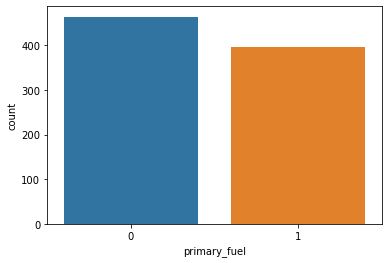

In [404]:
sns.countplot(df['primary_fuel'])

our target column is balanced.

## Correlation.

In [314]:
df_corr = df.corr()

<AxesSubplot:>

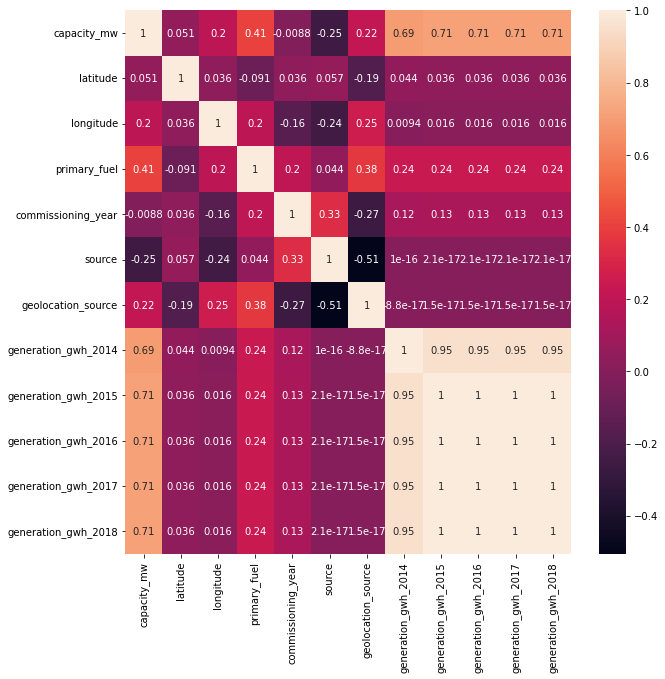

In [315]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot = True)

generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018; are correlated columns.

## Variance Inflation Factor

**- Seperating features and target columns.**

In [405]:
x = df.drop('primary_fuel',axis = 1)
y = df.primary_fuel

**- Scaling the features columns.**

In [406]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [407]:
a = x_scaled.shape[1]
a

11

In [408]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(a)]

In [409]:
vif['Feature'] = x.columns
vif

,vif,Feature
0,2.500040,capacity_mw
1,1.053332,latitude
2,1.137161,longitude
3,1.170892,commissioning_year
4,1.521310,source
5,1.479165,geolocation_source
6,11.132118,generation_gwh_2014
7,inf,generation_gwh_2015
8,inf,generation_gwh_2016
9,inf,generation_gwh_2017


## Features Selection.

In [321]:
best_feature = SelectKBest(score_func = f_classif, k =11)
fit = best_feature.fit(x,y)
av_score = pd.DataFrame(fit.scores_)
av_column = pd.DataFrame(x.columns)

In [322]:
feature_score = pd.concat([av_column,av_score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(11,'Scores')

,Feature Name,Scores
0,capacity_mw,174.986606
5,geolocation_source,141.304011
6,generation_gwh_2014,52.132368
7,generation_gwh_2015,51.526199
8,generation_gwh_2016,51.526199
9,generation_gwh_2017,51.526199
10,generation_gwh_2018,51.526199
3,commissioning_year,35.783165
2,longitude,34.374597
1,latitude,7.122221


Found that generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018; are correlated features and can be dropped as they will be giving the same result.

In [410]:
x.drop(columns = ['generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'],inplace = True)

In [411]:
x_scaled

array([[-0.56175024,  1.12026867, -0.85571825, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40297546,  0.57222399, -0.57853504, ...,  0.        ,
         0.        ,  0.        ],
       [-0.50073417,  0.11319488, -1.63917658, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.52351129, -0.94966799, -0.38161201, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4329016 ,  0.50546632, -0.75301278, ...,  0.        ,
         0.        ,  0.        ],
       [-0.53847435, -1.8062123 ,  0.00240918, ...,  0.        ,
         0.        ,  0.        ]])

## Training the Model.

## Classification

**- Train Test Split.**

In [412]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 9)

**- Function for Training & Testing.**

In [414]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_train,y_pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_train,y_pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', accuracy_score(y_test,pred))
        print('\n ----- Classification Report ----- \n', classification_report(y_test,pred))
        print('\n ----- Confusion matrix ----- \n', confusion_matrix(y_test,pred))

**- Model Instantiating.**

In [415]:
knn = KNeighborsClassifier()
lr = LogisticRegression()
ada = AdaBoostClassifier()
bc = BaggingClassifier()
rf = RandomForestClassifier()

**- KNeighbors Classifier.**

In [416]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9348837209302325

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       347
           1       0.95      0.91      0.93       298

    accuracy                           0.93       645
   macro avg       0.94      0.93      0.93       645
weighted avg       0.94      0.93      0.93       645


 ----- Confusion matrix ----- 
 [[332  15]
 [ 27 271]]

 ----- Test Result ----- 

Accuracy Score: 0.8842592592592593

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       117
           1       0.93      0.81      0.86        99

    accuracy                           0.88       216
   macro avg       0.89      0.88      0.88       216
weighted avg       0.89      0.88      0.88       216


 ----- Confusion matrix ----- 
 [[111   6]
 [ 19  80]]


**- Logistic Regression.**

In [330]:
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.8356589147286821

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.82      0.90      0.85       347
           1       0.86      0.77      0.81       298

    accuracy                           0.84       645
   macro avg       0.84      0.83      0.83       645
weighted avg       0.84      0.84      0.83       645


 ----- Confusion matrix ----- 
 [[311  36]
 [ 70 228]]

 ----- Test Result ----- 

Accuracy Score: 0.8287037037037037

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       117
           1       0.89      0.72      0.79        99

    accuracy                           0.83       216
   macro avg       0.84      0.82      0.82       216
weighted avg       0.84      0.83      0.83       216


 ----- Confusion matrix ----- 
 [[108   9]
 [ 28  71]]


**- AdaBoost Classifier.**

In [341]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9643410852713178

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       347
           1       0.97      0.96      0.96       298

    accuracy                           0.96       645
   macro avg       0.96      0.96      0.96       645
weighted avg       0.96      0.96      0.96       645


 ----- Confusion matrix ----- 
 [[337  10]
 [ 13 285]]

 ----- Test Result ----- 

Accuracy Score: 0.9027777777777778

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       117
           1       0.92      0.86      0.89        99

    accuracy                           0.90       216
   macro avg       0.91      0.90      0.90       216
weighted avg       0.90      0.90      0.90       216


 ----- Confusion matrix ----- 
 [[110   7]
 [ 14  85]]


**- RandomForest Classifier.**

In [418]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 1.0

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       347
           1       1.00      1.00      1.00       298

    accuracy                           1.00       645
   macro avg       1.00      1.00      1.00       645
weighted avg       1.00      1.00      1.00       645


 ----- Confusion matrix ----- 
 [[347   0]
 [  0 298]]

 ----- Test Result ----- 

Accuracy Score: 0.9259259259259259

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       117
           1       0.95      0.89      0.92        99

    accuracy                           0.93       216
   macro avg       0.93      0.92      0.93       216
weighted avg       0.93      0.93      0.93       216


 ----- Confusion matrix ----- 
 [[112   5]
 [ 11  88]]


**- Bagging Classifier.**

In [419]:
bc.fit(x_train,y_train)
score(bc, x_train,x_test,y_train,y_test,train = True)
score(bc, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9953488372093023

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       347
           1       1.00      0.99      0.99       298

    accuracy                           1.00       645
   macro avg       1.00      1.00      1.00       645
weighted avg       1.00      1.00      1.00       645


 ----- Confusion matrix ----- 
 [[346   1]
 [  2 296]]

 ----- Test Result ----- 

Accuracy Score: 0.9166666666666666

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       117
           1       0.94      0.88      0.91        99

    accuracy                           0.92       216
   macro avg       0.92      0.91      0.92       216
weighted avg       0.92      0.92      0.92       216


 ----- Confusion matrix ----- 
 [[111   6]
 [ 12  87]]


                *** RandomForestClassifier is giving the best score. ***

## Hyperparameter Tuning.

In [352]:
param = {'n_estimators': range(1,100,10),
         'criterion': ['gini','entropy'],
         'max_depth': [10,20,30],
         'max_features': ['sqrt','log2'],
         'min_impurity_decrease':[0.0,0.1,0.5,1.0],
         'random_state':range(10,100,10)}

In [353]:
grid = GridSearchCV(rf, param_grid = param)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_impurity_decrease': 0.0,
 'n_estimators': 21,
 'random_state': 70}

In [420]:
rf_hyp = RandomForestClassifier(criterion = 'entropy',max_depth = 10,max_features = 'sqrt',
                                min_impurity_decrease = 0.0, n_estimators = 21, random_state = 70)

In [421]:
rf_hyp.fit(x_train,y_train)
score(rf_hyp, x_train,x_test,y_train,y_test,train = True)
score(rf_hyp, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

Accuracy Score: 0.9875968992248062

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       347
           1       0.99      0.98      0.99       298

    accuracy                           0.99       645
   macro avg       0.99      0.99      0.99       645
weighted avg       0.99      0.99      0.99       645


 ----- Confusion matrix ----- 
 [[345   2]
 [  6 292]]

 ----- Test Result ----- 

Accuracy Score: 0.9166666666666666

 ----- Classification Report ----- 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       117
           1       0.94      0.88      0.91        99

    accuracy                           0.92       216
   macro avg       0.92      0.91      0.92       216
weighted avg       0.92      0.92      0.92       216


 ----- Confusion matrix ----- 
 [[111   6]
 [ 12  87]]


       *** Post tuning is not better then the previous one, so taking the previous default parameters only. ***

## Regression

In [356]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,0,2011.0,109,1,2467.075507,2470.559999,2470.559999,2470.559999,2470.559999
1,98.0,24.7663,74.6090,1,2015.0,174,2,2467.075507,2470.559999,2470.559999,2470.559999,2470.559999
2,39.2,21.9038,69.3732,0,2015.0,21,2,2467.075507,2470.559999,2470.559999,2470.559999,2470.559999
3,135.0,23.8712,91.3602,1,2004.0,22,2,617.789264,843.747000,843.747000,843.747000,843.747000
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,5916.370000,5916.370000,5916.370000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,2467.075507,0.994875,0.994875,0.994875,0.994875
903,3.0,12.8932,78.1654,0,2015.0,77,0,2467.075507,2470.559999,2470.559999,2470.559999,2470.559999
904,25.5,15.2758,75.5811,0,2015.0,21,2,2467.075507,2470.559999,2470.559999,2470.559999,2470.559999
905,80.0,24.3500,73.7477,1,2015.0,59,2,2467.075507,2470.559999,2470.559999,2470.559999,2470.559999


**- Seperating the features and target column for Regression Model.**

In [422]:
x = df.drop('capacity_mw',axis = 1)
y = df.capacity_mw

**- Scaling the features columns.**

In [423]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**- Train test split.**

In [434]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 90)

**- Function.**

In [426]:
def score(clas, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = clas.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('Accuracy Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = clas.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('Accuracy Score:', metrics.r2_score(y_test,pred))
        print('\n ----- Model Evaluation ----- \n')
        print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,pred))
        print('\n')
        plt.scatter(y_test,pred)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Actual VS Prediction")
        plt.show()

**- Model Instantiating.**

In [439]:
lr = LinearRegression()
ada = AdaBoostRegressor()
rf_reg = RandomForestRegressor()
hist = HistGradientBoostingRegressor()

**- Linear Regression.**


 ----- Train Result ----- 

Accuracy Score: 0.6095694987216598

 ----- Test Result ----- 

Accuracy Score: 0.7429210948681392

 ----- Model Evaluation ----- 

Mean Absolute Percentage Error: 11.962862467173645




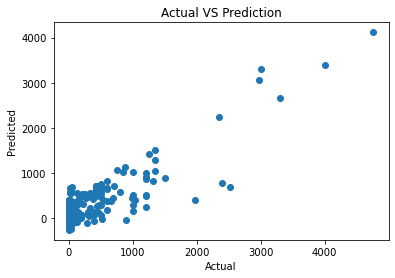

In [428]:
lr.fit(x_train,y_train)
score(lr, x_train,x_test,y_train,y_test,train = True)
score(lr, x_train,x_test,y_train,y_test,train = False)

**- AdaBoost Regressor.**


 ----- Train Result ----- 

Accuracy Score: 0.7124554092602424

 ----- Test Result ----- 

Accuracy Score: 0.6500981350781974

 ----- Model Evaluation ----- 

Mean Absolute Percentage Error: 10.392520536105106




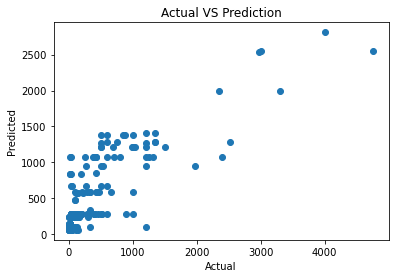

In [429]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)

**- RandomForest Regressor.**


 ----- Train Result ----- 

Accuracy Score: 0.9635430029034453

 ----- Test Result ----- 

Accuracy Score: 0.8625744428488039

 ----- Model Evaluation ----- 

Mean Absolute Percentage Error: 1.4320664890530241




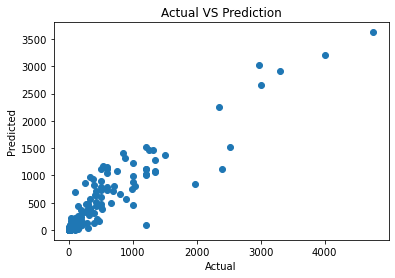

In [430]:
rf_reg.fit(x_train,y_train)
score(rf_reg, x_train,x_test,y_train,y_test,train = True)
score(rf_reg, x_train,x_test,y_train,y_test,train = False)

**- HistGradientBoosting Regressor.**


 ----- Train Result ----- 

Accuracy Score: 0.8847442829535511

 ----- Test Result ----- 

Accuracy Score: 0.7542501407110079

 ----- Model Evaluation ----- 

Mean Absolute Percentage Error: 3.790240058643513




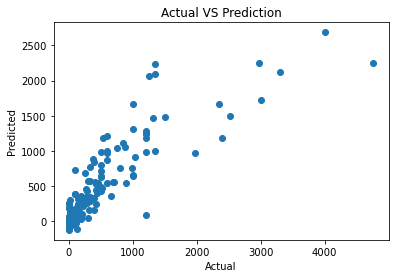

In [431]:
hist.fit(x_train,y_train)
score(hist, x_train,x_test,y_train,y_test,train = True)
score(hist, x_train,x_test,y_train,y_test,train = False)

        *** RandomForestRegressor, is giving the best score and also the percentage error is less. ***

**- Saving the classification Model.**

In [437]:
filename = 'global_classi.pickle'
pickle.dump(rf, open(filename, 'wb'))

**- Saving the Regression Model.**

In [440]:
filename = 'global_reg.pickle'
pickle.dump(rf_reg, open(filename, 'wb'))